Q1. What is the mathematical formula for a linear SVM?


In [ ]:
"""
A linear Support Vector Machine (SVM) aims to find a hyperplane, w * x + b = 0, that maximizes the margin between
two classes, represented by feature vectors (x) and class labels (y). The decision function, f(x) = sign(w * x + b),
classifies new data points based on whether they fall above or below the hyperplane. SVM training minimizes 
1/2 * ||w||^2 while ensuring that all training points are correctly classified, subject to the constraint
y_i * (w * x_i + b) ≥ 1 for all data points. This hard-margin formulation assumes linear separability, and in practice,
soft-margin SVMs handle non-separable data by introducing slack variables and regularization.
"""

Q2. What is the objective function of a linear SVM?


In [ ]:
"""
The objective function of a linear Support Vector Machine (SVM) is to find the optimal values of the weight
vector (w) and the bias term (b) in order to maximize the margin between two classes while correctly classifying 
the training data. The objective function can be expressed as follows:

Minimize: 1/2 * ||w||^2

Subject to: y_i * (w * x_i + b) ≥ 1 for all data points (i = 1 to n)

Here's what each part of the objective function represents:

1/2 * ||w||^2: 
This term is a regularization term and represents the square of the Euclidean norm (length) of the weight vector w.
Minimizing this term encourages finding a hyperplane with a larger margin and prevents overfitting.

y_i * (w * x_i + b):
This term is the decision function for each data point (x_i), where y_i is the class label (+1 or -1). The goal is to
ensure that all data points are correctly classified and lie on or beyond the margin boundary.

The objective function aims to strike a balance between maximizing the margin (controlled by the regularization term) and 
ensuring that all data points are correctly classified (controlled by the constraint). This optimization problem seeks to
find the hyperplane that best separates the two classes while being as far away from the data points as possible.
"""

Q3. What is the kernel trick in SVM?


In [ ]:
"""
The kernel trick in Support Vector Machines (SVM) is a clever mathematical technique employed to address nonlinear 
classification problems by implicitly transforming data into a higher-dimensional space without explicitly computing
and storing the transformed feature vectors. SVMs seek to find a hyperplane that best separates different classes of
data points. However, linear hyperplanes may fail to capture complex, nonlinear decision boundaries in the original
input space.

Instead of performing the computationally expensive explicit transformation of input data into a higher-dimensional
space, the kernel trick introduces kernel functions (e.g., linear, polynomial, or radial basis function) that
calculate the dot product of transformed feature vectors in the higher-dimensional space without directly computing
them. These kernel functions assess the similarity between data points in the transformed space, allowing SVMs to
effectively model complex decision boundaries.

Selecting the appropriate kernel function and its hyperparameters is critical to SVM performance. The kernel trick
empowers SVMs to handle nonlinear data by working implicitly in higher-dimensional spaces, enabling them to capture
intricate relationships within the data while maintaining computational efficiency.
"""

Q4. What is the role of support vectors in SVM Explain with example


In [ ]:
"""
Support vectors are essential elements in the functioning of Support Vector Machines (SVMs), serving as the
foundation for the SVM's classification capabilities. In SVMs, the primary objective is to find a hyperplane 
that maximizes the margin between different classes of data while ensuring accurate classification. Support 
vectors are the data points that directly influence this hyperplane and margin construction.

Consider a binary classification problem in a two-dimensional feature space. The support vectors are the data
points that are nearest to the decision boundary, with some on each side, typically belonging to different
classes. They define the optimal margin as the distance between the hyperplane and the closest support vectors.

Support vectors play a vital role because they determine the position and orientation of the decision boundary.
The SVM aims to maximize this margin while guaranteeing that all other data points are correctly classified.
Data points that are not support vectors do not affect the hyperplane's position as long as they remain within
the margin boundaries.

In essence, support vectors are critical in SVMs as they enable the model to focus on the most informative data
points for defining an effective decision boundary, making SVMs robust and effective for various classification 
tasks, including those involving non-linear boundaries when kernel functions are used.
"""

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?


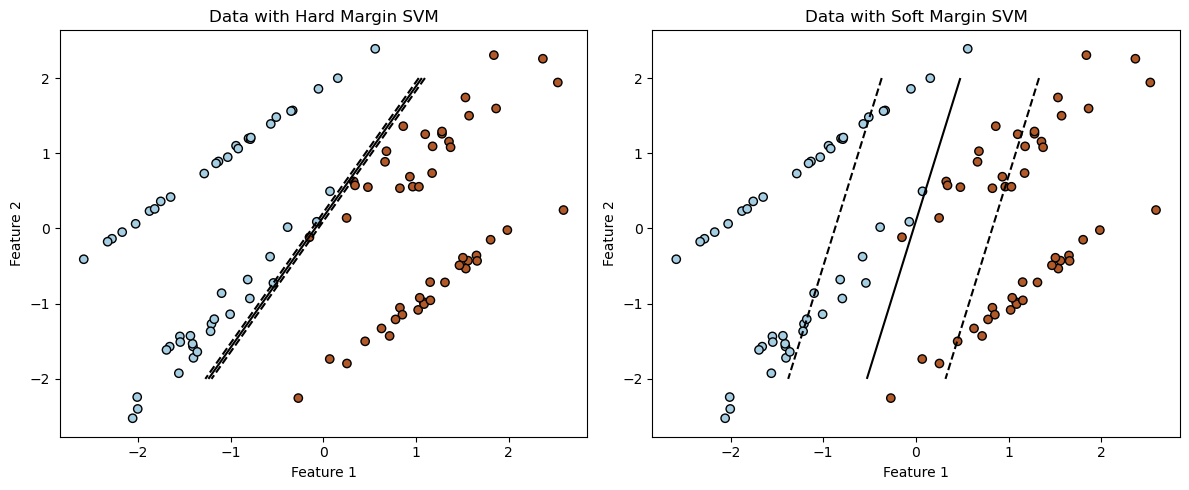

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Create synthetic data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a hard margin SVM
hard_margin_clf = svm.SVC(kernel='linear', C=1000)
hard_margin_clf.fit(X, y)

# Fit a soft margin SVM
soft_margin_clf = svm.SVC(kernel='linear', C=0.1)
soft_margin_clf.fit(X, y)

# Create a meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

# Predict class for each point in the meshgrid
Z_hard = hard_margin_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_hard = Z_hard.reshape(xx.shape)

Z_soft = soft_margin_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)

# Plot the data points
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('Data with Hard Margin SVM')
plt.contour(xx, yy, Z_hard, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('Data with Soft Margin SVM')
plt.contour(xx, yy, Z_soft, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


"""
In this code, we first create synthetic data and then fit two SVM models: one with a hard margin (large C)
and another with a soft margin (small C). We then plot the data points along with the decision boundaries 
(hyperplanes) and marginal planes for both cases.

The left subplot shows the hard margin SVM, where the margin is narrow, and all data points are correctly 
classified. The right subplot shows the soft margin SVM, which has a wider margin and tolerates some 
misclassified points to accommodate possible noise or overlapping data.
"""

Q6. SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.
- Train a linear SVM classifier on the training set and predict the labels for the testing set.
- Compute the accuracy of the model on the testing set.
- Plot the decision boundaries of the trained model using two of the features.
- Try different values of the regularisation parameter C and see how it affects the performance of the model.



Accuracy:  0.95


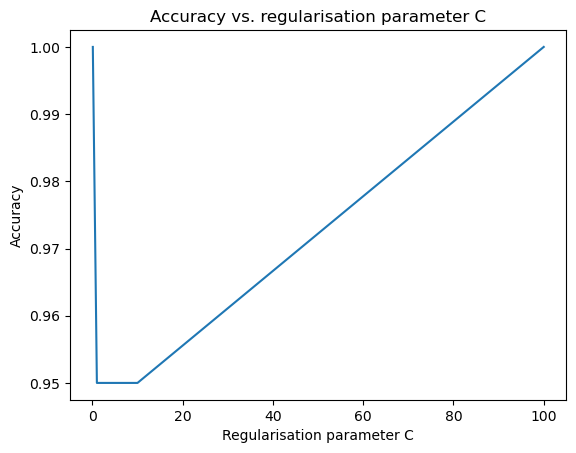

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#load Dataset
df=sns.load_dataset('iris')

le=LabelEncoder()

#Defining X,y
X=df.drop('species',axis=1)
y=le.fit_transform(df[['species']])

# split train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=42)

# Scaling X train and X test 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Define and predict Model
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# Accuracy
print("Accuracy: ",accuracy_score(y_pred,y_test)) #0.95



# Try different values of the regularisation parameter C and see how it affects the performance of the model.
C_values = [0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

plt.plot(C_values, accuracies)
plt.xlabel('Regularisation parameter C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. regularisation parameter C')
plt.show()

Bonus task: 

Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df=sns.load_dataset('tips')

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

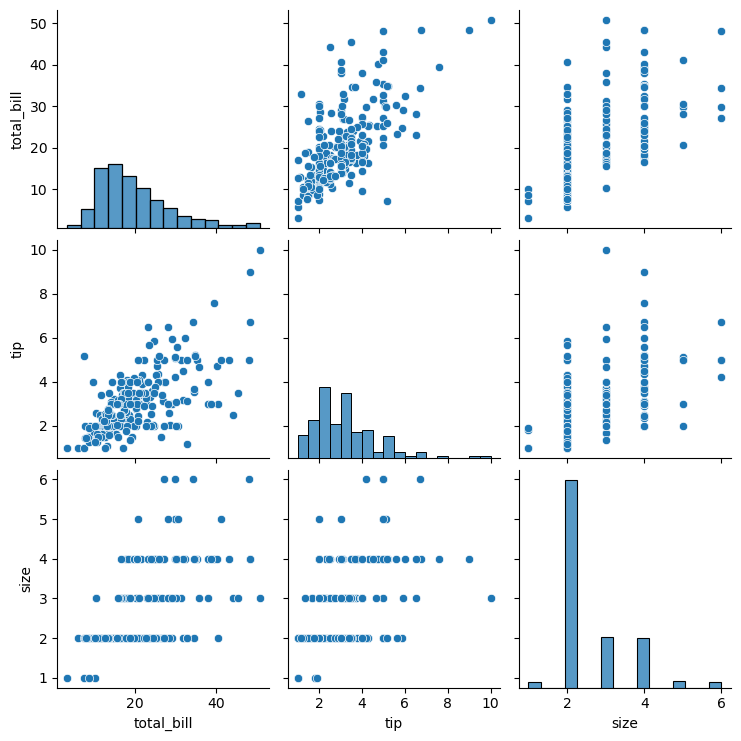

In [13]:
sns.pairplot(df)

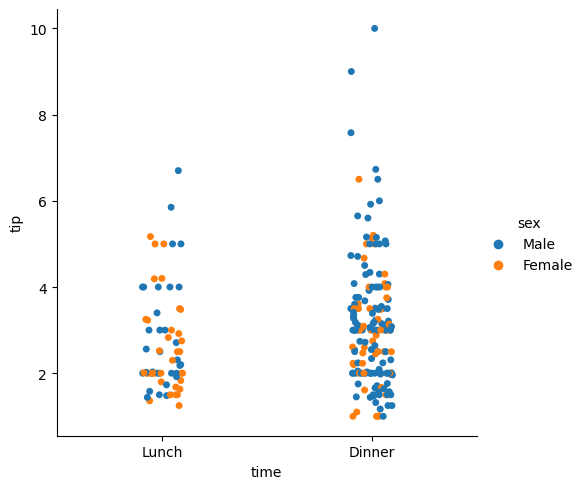

In [14]:
sns.catplot(data=df,x='time',y='tip',hue='sex')


In [15]:
df[df.time=='Lunch']['sex'].value_counts()

Female    35
Male      33
Name: sex, dtype: int64

In [16]:
df[df.time=='Dinner']['sex'].value_counts()

Male      124
Female     52
Name: sex, dtype: int64

# Observation
- 72.21% Custumers come for Dinner
- 70.45% Male and 29.54% Female Customers come restaurant For Dinner

In [18]:
# X,y
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.drop('time',axis=1)
y=le.fit_transform(df['time'])

In [19]:
# Split Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
X_train

,total_bill,tip,sex,smoker,day,size
7,26.88,3.12,Male,No,Sun,4
83,32.68,5.00,Male,Yes,Thur,2
176,17.89,2.00,Male,Yes,Sun,2
106,20.49,4.06,Male,Yes,Sat,2
156,48.17,5.00,Male,No,Sun,6
...,...,...,...,...,...,...
67,3.07,1.00,Female,Yes,Sat,1
192,28.44,2.56,Male,Yes,Thur,2
117,10.65,1.50,Female,No,Thur,2
47,32.40,6.00,Male,No,Sun,4


In [34]:
#categorical to Numerical
cat=['sex','smoker','day']
X_train_encoded=pd.get_dummies(X_train,columns=cat)
X_test_encoded=pd.get_dummies(X_test,columns=cat)

In [36]:
X_train_encoded.drop(labels=['sex_Female','smoker_No'],axis=1,inplace=True)
X_test_encoded.drop(labels=['sex_Female','smoker_No'],axis=1,inplace=True)

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train_encoded)
X_test_scaled=Scaler.transform(X_test_encoded)

In [53]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8775510204081632

In [57]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# define parameter range
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001]}


clf=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3)
clf.fit(X_train_scaled,y_train)
clf.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.744 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.718 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.744 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.718 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.718 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.949 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.949 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.949 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.974 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.744 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

{'C': 1, 'gamma': 0.1}

In [62]:
y_pred=clf.predict(X_test_scaled)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)


0.8775510204081632

In [70]:
confusion_matrix(y_pred,y_test)

array([[34,  5],
       [ 1,  9]])